# Clustering the features

## Importing libraries and documents

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv("../housekeeper/Data/clean_data_modelling.csv")

## Data preprocessing

In [70]:
df = df.drop(columns="Unnamed: 0")
df_cluster = df.dropna() #Creating subset with the rows without any NaN value
df_cluster = df_cluster.drop(columns=["tasks", "share_flat", "use_app", "clean_outsource"]) 

#Encoding the columns
encoding_dictionaire = {"language":     {"English": 1, "Spanish": 2, "Italian": 3, "French": 4},
                        "age": {"18–24": 1, "25–30": 2, "31–37": 3, "More than 37": 4},
                        "animals": {"Cats": 1, "Dogs": 2, "No pets": 3},
                        "relationship": {"Friends, Family": 1, "Acquaintances": 2, "Partner": 3, "People I met on app": 4, "Other":5},
                        "schedule_tool": {"We just remember": 1, "White board on the fridge door": 2, "Spreadsheet":3,
                                          "We don't schedule our tasks": 4, "Todoist": 5, "Trello":6},
                        "task_rotation": {"Once a week": 1, "Once a month": 2, "Never": 3, 
                                          "Twice a week": 4, "Twice a month":5},
                        "shared_expenses": {"Split the cost": 1, "Buy it in turns":2, 
                                            "We don't really think about it": 3},
                        "alone_all": {"Alone": 1, "All together": 2, "Solo": 1}}

df_encoded = df_cluster.replace(encoding_dictionaire)

#Encoding the features columns
df_encoded = df_encoded.replace("Very unlikely", "1").replace("Unlikely", 2).\
            replace("Neutral", 3).replace("Likely", 4).replace("Very likely", 5)

df_encoded = df_encoded.astype(int) #Changing the cols types to int for modelling

In [71]:
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df_encoded)
df_scaled = pd.DataFrame(scaled, columns=df_encoded.columns)

## Dimensionality reduction

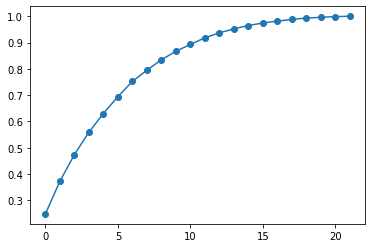

In [72]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(df_scaled)
plt.plot(range(0,22), pca.explained_variance_ratio_.cumsum(), marker="o")

In [73]:
pca = PCA(n_components=5)
pca_df = pd.DataFrame(pca.fit_transform(df_scaled))

## Data modelling

In [74]:
from sklearn.cluster import KMeans
model = []
for i in range(1,23):
    kmeans_pca = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans_pca.fit(pca_df)
    model.append(kmeans_pca.inertia_)

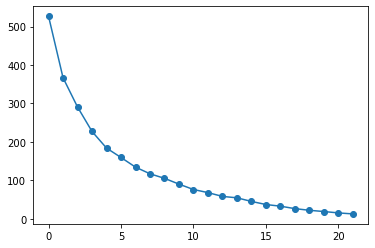

In [75]:
plt.plot(range(0,22), model, marker="o")

In [76]:
kmeans_pca = KMeans(n_clusters=3, init="k-means++", random_state=42)
kmeans_pca.fit(pca_df)

KMeans(n_clusters=3, random_state=42)

In [77]:
df_pca_kmeans = pd.concat([df_cluster.reset_index(drop=True), pd.DataFrame(pca_df)], axis=1)
df_pca_kmeans.columns.values[-5:] = ["comp_1", "comp_2", "comp_3", "comp_4", "comp_5"]
df_pca_kmeans["cluster"] = kmeans_pca.labels_

In [109]:
import plotly.express as px
fig = px.scatter_3d(df_pca_kmeans, x='comp_1', y='comp_2', z='comp_5', color="cluster")#, symbol="comp_4")
fig.show()